In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

Read the file 01_Customerdata.csv into the df variable. This will create a Pandas dataframe.

(df = pd.read_csv('FileName'))

Display the first 10 rows of the dataframe.

In [15]:
df = pd.read_csv('Trips_ROP_transformed_2021_Q1.csv')
df.head(10)

,Bucket,StartName,EndName,Wochentag(d),Tageszeit(h),Schulferien,Distanz,Count
0,2021-03,Hunedoara(71171 - 03254026000002),Hunedoara(71171 - 03254026000007),Di,7,Keine Ferien,3,15
1,2021-03,Turda(80982 - 03241013050002),Turda(80982 - 03241013050008),Mi,17,Keine Ferien,0,10
2,2021-03,Turda(80982 - 03241013050007),Turda(80982 - 03241013030001),Sa,11,Keine Ferien,3,10
3,2021-03,Bran(91157 - 03254028001012),Bran(91157 - 03254028001004),Fr,13,Keine Ferien,0,15
4,2021-03,Bran(91157 - 03254028001003),Turda(80982 - 03241013070001),Fr,18,Keine Ferien,7,10
5,2021-03,Bran(91157 - 03254028001008),Bran(91157 - 03254028001013),So/Fe,14,Keine Ferien,0,30
6,2021-03,Hunedoara(71171 - 03254026000001),Turda(80982 - 03241013050002),Sa,9,Keine Ferien,7,10
7,2021-03,Hunedoara(71171 - 03254026000004),Hunedoara(71171 - 03254026000003),Mo,6,Keine Ferien,6,10
8,2021-03,Hunedoara(71171 - 03254026000015),Turda(80982 - 03241013070001),Fr,11,Keine Ferien,4,10
9,2021-03,Bran(91157 - 03254028001003),Hunedoara(71171 - 03254026000004),Mo,19,Keine Ferien,7,10


## 1.1 Categorization of attributes


If the header is read correctly, now classify the attributes into the following categories:

**Nominal Attributes**

StartName
EndName
Schulferien


**Ordinal Attributes**
Wochentag(d)

**Metric continuous Attributes**


**Metric discrete Attributes**
Tageszeit(h)
Distanz
Count
Bucket (potentiellement)

## 1.2 Statistical parameters

First, calculate key statistical measures of the numeric columns using the describe() function.

In [16]:
df.describe()

,Tageszeit(h),Distanz,Count
count,130843.000000,130843.000000,130843.000000
mean,13.122888,2.514953,13.567176
std,4.005845,12.838041,11.185673
min,0.000000,0.000000,5.000000
25%,10.000000,1.000000,10.000000
50%,13.000000,2.000000,10.000000
75%,16.000000,4.000000,15.000000
max,23.000000,3000.000000,165.000000


Now display the variance of the columns.

In [17]:
df.var(numeric_only=True)

Tageszeit(h)     16.046798
Distanz         164.815300
Count           125.119276
dtype: float64

The following code creates a new variable param, which contains the essential measures plus variance and skewness. Try to understand the code and find the individual commands in the CheatSheet. Add a line for the median.

In [20]:
param = df.describe()
metricAttributes = ['Tageszeit(h)','Distanz','Count']
param.loc['var',:] = df[metricAttributes].var()
param.loc['skew',:] = df[metricAttributes].skew()
param.loc['median',:] = df[metricAttributes].median()
param.head(10)

,Tageszeit(h),Distanz,Count
count,130843.000000,130843.000000,130843.000000
mean,13.122888,2.514953,13.567176
std,4.005845,12.838041,11.185673
min,0.000000,0.000000,5.000000
25%,10.000000,1.000000,10.000000
50%,13.000000,2.000000,10.000000
75%,16.000000,4.000000,15.000000
max,23.000000,3000.000000,165.000000
var,16.046798,164.815300,125.119276
skew,-0.119732,205.325118,3.922665


## 1.3 Histogram

Create a (pandas) histogram for the "age_first_order" column.

Attention: "Missing values" have not been considered here and may be relevant for further analysis.

<Axes: ylabel='Frequency'>

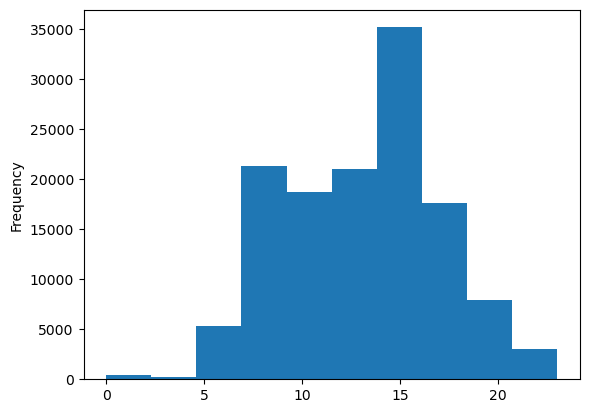

In [33]:
# Space for pandas histogram
df["Tageszeit(h)"].plot.hist()

there is a more elegant solution. look at the parameters used for the histogram in the lecture. adjust them individually for this histogram. make sure that the bars are clearly recognisable with lines (parameter:edgecolor), that you choose the number of bins well (parameter: bins) and adjust the range (parameter: range).

<Axes: ylabel='Frequency'>

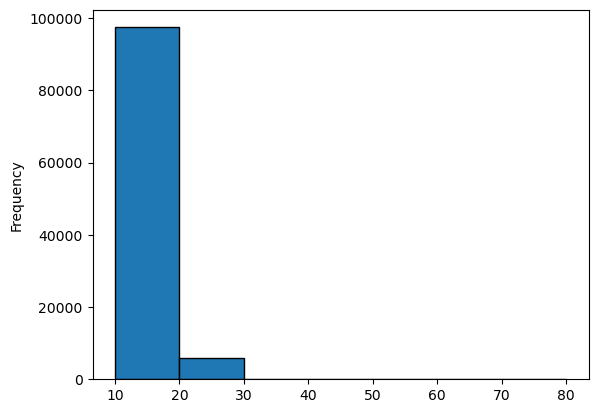

In [35]:
df["Tageszeit(h)"].plot.hist(edgecolor='black', bins= 7, range= (10,80))

Create a (pandas) histogram for the "pages_visited_avg" column. 
Here you should also insert Q1, median and Q3. 
since this column makes ‘small steps’ in the numbers, it is advisable to adjust the x-ticks. a tip: the bins then result from the maximum value of the histogram divided by the number of ticks for a nice histogram.

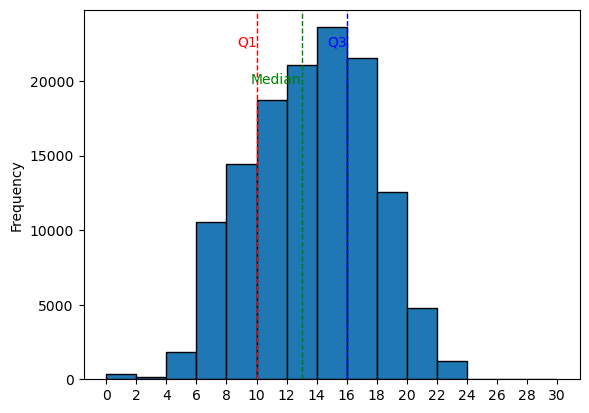

In [38]:
ax = df["Tageszeit(h)"].plot.hist(edgecolor='black', bins=15, range=(0,30))
# Set the X-axis ticks in steps of 2
ax.set_xticks(np.arange(0, 31, 2))

# calculation of the quantiles
q1 = df["Tageszeit(h)"].quantile(0.25)
median = df["Tageszeit(h)"].median()
q3 = df["Tageszeit(h)"].quantile(0.75)

# Inserting the lines for Q1, median and Q3
plt.axvline(q1, color='red', linestyle='dashed', linewidth=1)
plt.axvline(median, color='green', linestyle='dashed', linewidth=1)
plt.axvline(q3, color='blue', linestyle='dashed', linewidth=1)

# Labelling of the lines
plt.text(q1, plt.ylim()[1]*0.9, 'Q1', color='red', ha='right')
plt.text(median, plt.ylim()[1]*0.8, 'Median', color='green', ha='right')    # the *0.8 sets "median" a bit more low
plt.text(q3, plt.ylim()[1]*0.9, 'Q3', color='blue', ha='right')

plt.show()

**What do you notice when comparing the top and bottom histograms?**

This is a histogram for the column "age_first_order" as a function of "y = total_sum".

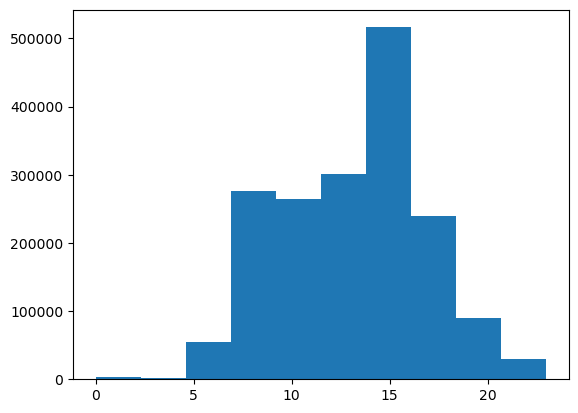

In [39]:
plt.hist(df["Tageszeit(h)"],
         weights = df['Count'])
plt.show()

## 1.4 Box plot
The code below creates a box plot for the "pages_visited_avg" attribute.

**What statistical quantity does it represent?**

**What does the difference between median and mean say about the distribution?**


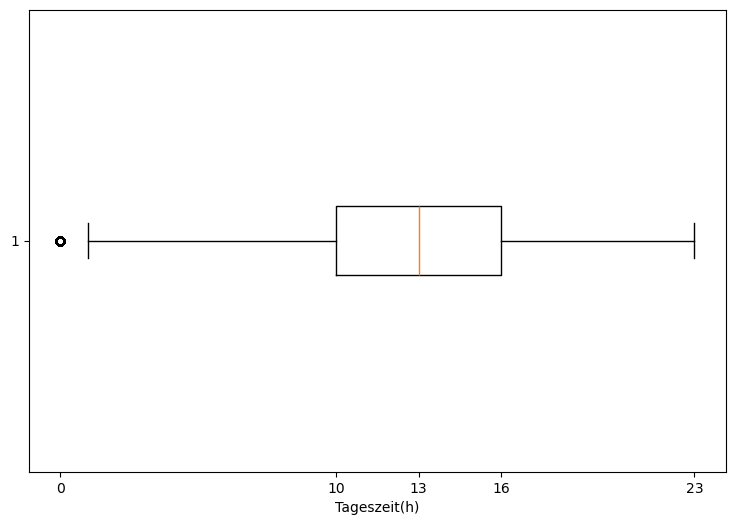

In [40]:
vel_arr = df['Tageszeit(h)']
fig = plt.figure(1, figsize = (9, 6))
ax = fig.add_subplot()

ax.boxplot(vel_arr, vert = False)
ax.set_xlabel('Tageszeit(h)')

quantiles = np.quantile(vel_arr, np.array([0.00, 0.25, 0.50, 0.75, 1.00]))

ax.set_xticks(quantiles)
plt.show()

creates 2 box plots in a diagram next to each other. one box plot for the column ‘age_first_order’ and one box plot for the column ‘pages_visited_avg’.

In [ ]:
df['age_first_order'] = pd.to_numeric(df['age_first_order'], errors='coerce')   #this statement removes Nan values in the column for the box plot, as otherwise the box slot would not be displayed
df = df.dropna(subset=['age_first_order'])

# Creating the box plots
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['age_first_order'])
plt.title('Age First Order')
plt.xlabel('Age')

plt.subplot(1, 2, 2)
plt.boxplot(df['pages_visited_avg'])
plt.title('Pages Visited Average')
plt.xlabel('Pages Visited')

plt.tight_layout()
plt.show()

## 1.5 Linear correlations
The corr() command creates a table with all the (linear) correlations of a dataframe. The table is redundant and therefore only one of the two "triangular matrices" is important to consider. Apply the command to the dataframe.

**Which two values correlate most positively and which correlate most negatively?**


In [ ]:
# space

## 1.6 Correlations Heatmap
Since tables are difficult for the human eye to interpret, a heat map of a correlation matrix is shown here. The data parameter must be given the correlation table created above.


In [ ]:
sn.heatmap(data = XXX, annot = True)

## 1.7 Scatter plots
Create a (pandas) scatter plot between age_first_order and total_sum.

In [ ]:
# space

Compare the scatter plot with the lower variant. Change the parameter s and observe the change.

In [ ]:
plt.scatter(df['age_first_order'], df['total_sum'], s = 0.5)
plt.xlabel('age_first_order')
plt.ylabel('total_Sum')

The bottom command creates scatter plots of combinations of attributes and arranges them in the form of a matrix.

In [ ]:
sn.pairplot(data = df[["age_first_order", "total_sum", "pages_visited_avg"]])

## 1.8 Histograms for categorical variables

Now create a histogram for user_agent_brand. To do this, first use a dedicated command to find out which different values appear in the column.

In [1]:
# space for the command to find out the unique values

In [ ]:
#space for the histogramm of user_agent_brand